# Computer Vision & Convolutional Neural Network in TensorFlow
## Downloading our image dataset for food vision model

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.5.0


In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-15 13:10:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   133MB/s    in 0.8s    

2021-08-15 13:10:27 (133 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Exploring the `pizza_steak` dataset

In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} file(s) in '{dirpath}'.")

There are 2 directories and 1 file(s) in 'pizza_steak'.
There are 2 directories and 1 file(s) in 'pizza_steak/test'.
There are 0 directories and 250 file(s) in 'pizza_steak/test/steak'.
There are 0 directories and 250 file(s) in 'pizza_steak/test/pizza'.
There are 2 directories and 1 file(s) in 'pizza_steak/train'.
There are 0 directories and 750 file(s) in 'pizza_steak/train/steak'.
There are 0 directories and 750 file(s) in 'pizza_steak/train/pizza'.


In [6]:
# or...
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
# create a list of class_names from the sub-dirs
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [8]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  Select an image randomly from target_dir and plot
  """
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}.")
  return img


3193599.jpg
Image shape: (512, 384, 3).


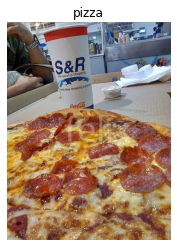

In [9]:
img = view_random_image(target_dir="pizza_steak/train", target_class="pizza")

In [10]:
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[195, 173, 152],
        [197, 174, 156],
        [197, 176, 159],
        ...,
        [115, 121, 119],
        [129, 135, 135],
        [ 87,  96,  95]],

       [[139, 117,  96],
        [132, 110,  89],
        [122, 101,  82],
        ...,
        [ 85,  92,  98],
        [ 85,  94, 101],
        [ 94, 103, 110]],

       [[141, 119,  96],
        [134, 112,  89],
        [125, 104,  83],
        ...,
        [102, 110, 129],
        [ 75,  86, 104],
        [ 73,  84, 102]],

       ...,

       [[183, 176, 160],
        [182, 175, 159],
        [183, 176, 160],
        ...,
        [192, 161, 115],
        [185, 153, 104],
        [167, 134,  81]],

       [[179, 173, 161],
        [183, 177, 165],
        [188, 180, 169],
        ...,
        [158, 127,  81],
        [165, 133,  84],
        [170, 139,  85]],

       [[172, 166, 154],
        [179, 173, 161],
        [187, 181, 169],
        ...,
        [162, 131,  8

## An end-to-end example 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to data dir
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

tinyVGG_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
],name="tinyVGG")

tinyVGG_model.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

history = tinyVGG_model.fit(train_data, epochs=5, 
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data)
                            )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 217ms/step - loss: 0.5991 - accuracy: 0.6653 - val_loss: 0.4193 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 0.4277 - accuracy: 0.8067 - val_loss: 0.3492 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3975 - accuracy: 0.8260 - val_loss: 0.3712 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3701 - accuracy: 0.8340 - val_loss: 0.3112 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3247 - accuracy: 0.8700 - val_loss: 0.2967 - val_accuracy: 0.8740


In [12]:
def plot_history(model_history):
  """
  Helper function to automate plotting a tf history object
  """
  df = pd.DataFrame(model_history.history)

  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  df.loss.plot(label="training loss")
  df.val_loss.plot(label="testing loss")
  plt.ylabel("LOSS")
  plt.xlabel("EPOCHS")
  plt.legend()

  plt.subplot(1,2,2)
  df.accuracy.plot(label="training acc")
  df.val_accuracy.plot(label="testing acc")
  plt.ylabel("ACCURACY")
  plt.xlabel("EPOCHS")
  plt.legend()
  plt.tight_layout()
  return plt.show()

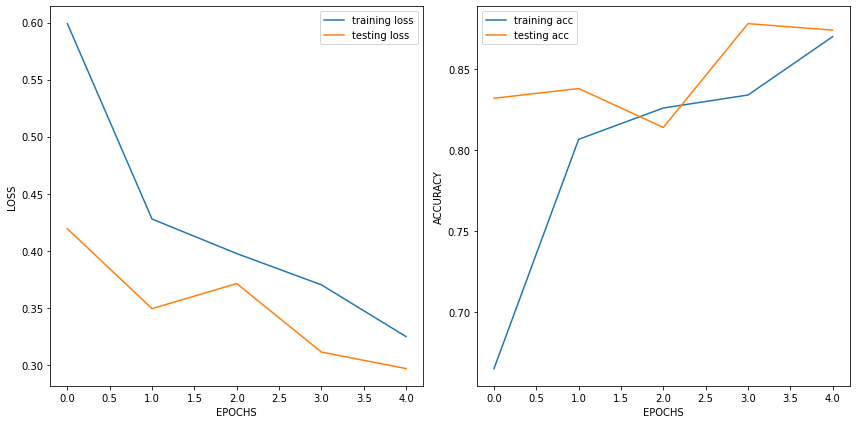

In [13]:
plot_history(history)

In [14]:
tinyVGG_model.summary()

Model: "tinyVGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0   

## Using a non-CNN Model to classify data

In [15]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="non_CNN_model1")

model2.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

history2 = model2.fit(train_data, epochs=5, 
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data)
                            )

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.7685 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


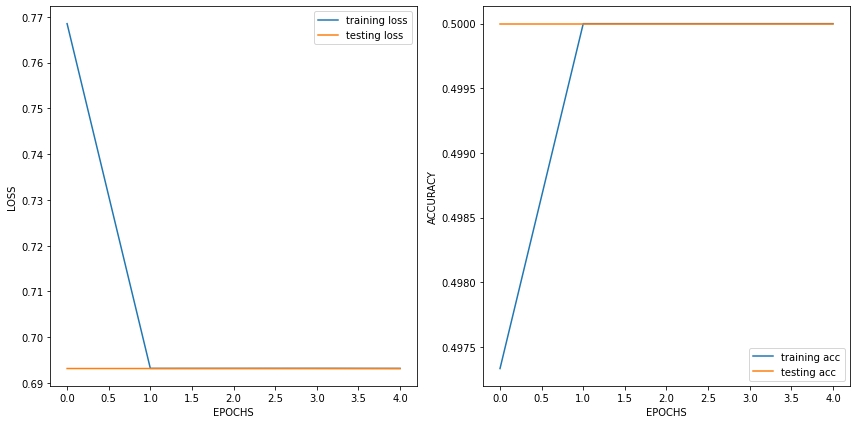

In [16]:
plot_history(history2)

In [17]:
model2.summary()

Model: "non_CNN_model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
# try to improve model2
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="non_CNN_model2")

model3.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

history3 = model3.fit(train_data, epochs=5, 
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data)
                            )

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 3.5644 - accuracy: 0.5880 - val_loss: 0.6489 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5641 - accuracy: 0.7413 - val_loss: 0.4662 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4953 - accuracy: 0.7673 - val_loss: 0.4666 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4694 - accuracy: 0.7933 - val_loss: 0.4807 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5572 - accuracy: 0.7387 - val_loss: 0.5948 - val_accuracy: 0.7340


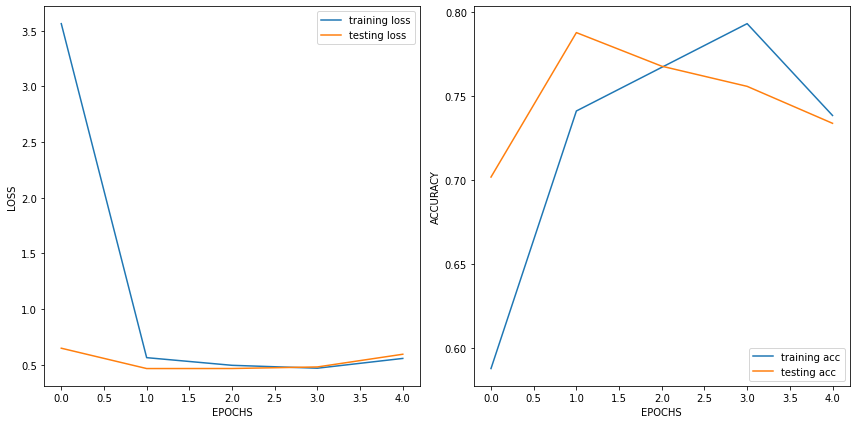

Model: "non_CNN_model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
plot_history(history3)
model3.summary()

# Binary Classification

## 1. Exploring the dataset

2983260.jpg
Image shape: (512, 512, 3).
3713343.jpg
Image shape: (512, 512, 3).


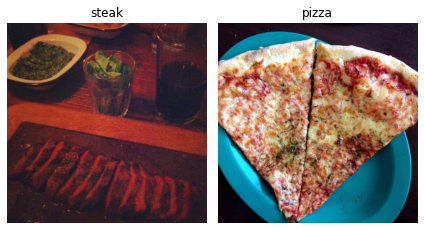

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", "pizza")
plt.tight_layout()
plt.show()


## 2. Preprocess the data

In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# load in img data from dirs and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
                                               
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# get a sample of a training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [23]:
# how many batches?
len(train_data)

47

In [24]:
images[:2], images[0].shape, labels[:2]

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

## 3. Create a baseline CNN Model

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# 3 layer CNN (baseline)
model_4 = Sequential([
  Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
         activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
], name="baseline_model")

model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_4 = model_4.fit(train_data, epochs=5,steps_per_epoch=len(train_data),
                        validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.9587 - accuracy: 0.6673 - val_loss: 0.4476 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4339 - accuracy: 0.8067 - val_loss: 0.4146 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.2955 - accuracy: 0.8867 - val_loss: 0.4096 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.1343 - accuracy: 0.9593 - val_loss: 0.4422 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.0469 - accuracy: 0.9907 - val_loss: 0.5599 - val_accuracy: 0.7960


Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


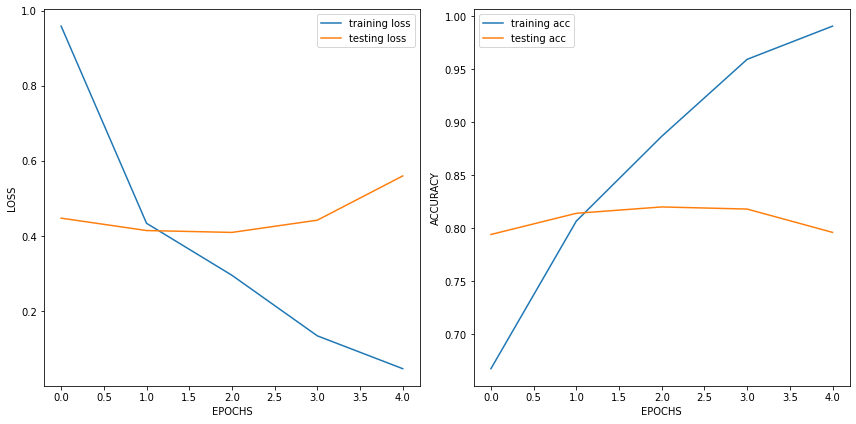

In [27]:
model_4.summary()
plot_history(history_4)

## 4. Using MaxPooling to reduce overfitting 

In [28]:
model_5 = Sequential([
  Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
         activation="relu", input_shape=(225, 225, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
], name="baseline_model_plus_pooling")

model_5.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_5 = model_5.fit(train_data, epochs=5,steps_per_epoch=len(train_data),
                        validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6599 - accuracy: 0.6220 - val_loss: 0.5143 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4765 - accuracy: 0.7847 - val_loss: 0.3744 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4202 - accuracy: 0.8127 - val_loss: 0.3393 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3997 - accuracy: 0.8147 - val_loss: 0.3232 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3885 - accuracy: 0.8333 - val_loss: 0.3233 - val_accuracy: 0.8660


Model: "baseline_model_plus_pooling"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 223, 223, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 676

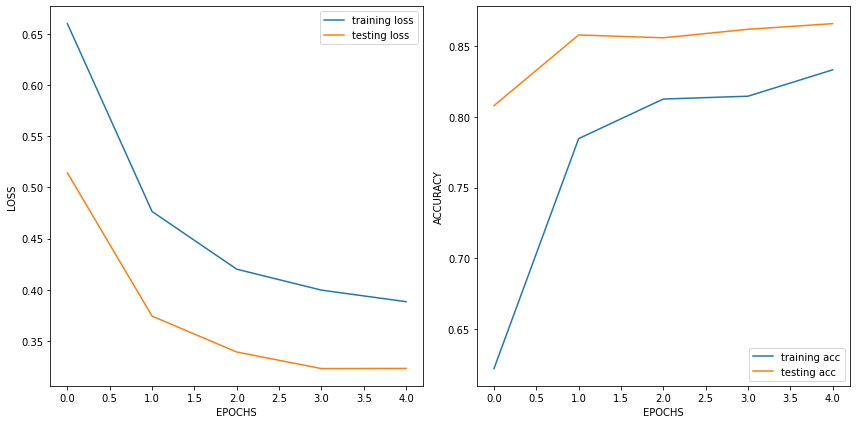

In [29]:
model_5.summary()
plot_history(history_5)

## 6. Reducing overfitting with data augmentation

In [30]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
print("Augmented training data:")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="binary",
                                                       shuffle=False)

print("\nNon-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("\nNon-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented test data:
Found 500 images belonging to 2 classes.


In [32]:
images, labels = train_data.next()

aug_images, aug_labels = train_data_aug.next()

Showing image number: 20


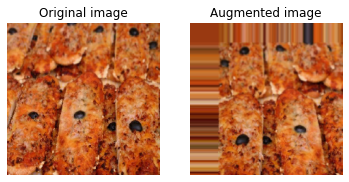

In [33]:
import random
random_number = random.randint(0, 32)
plt.figure()
plt.subplot(1,2,1)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(aug_images[random_number])
plt.title("Augmented image")
plt.axis(False)
plt.show()

In [34]:
model_6 = Sequential([
  Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
         activation="relu", input_shape=(226, 226, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
], name="baseline_model_plus_pooling_with_aug_data")

model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug, epochs=5, steps_per_epoch=len(train_data_aug),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 487ms/step - loss: 0.7179 - accuracy: 0.4287 - val_loss: 0.6879 - val_accuracy: 0.5860
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6951 - accuracy: 0.5227 - val_loss: 0.6830 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6901 - accuracy: 0.5580 - val_loss: 0.6758 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6846 - accuracy: 0.5613 - val_loss: 0.6347 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6847 - accuracy: 0.5760 - val_loss: 0.5952 - val_accuracy: 0.7400


Model: "baseline_model_plus_pooling_with_aug_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 110, 110, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 53, 53, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)      

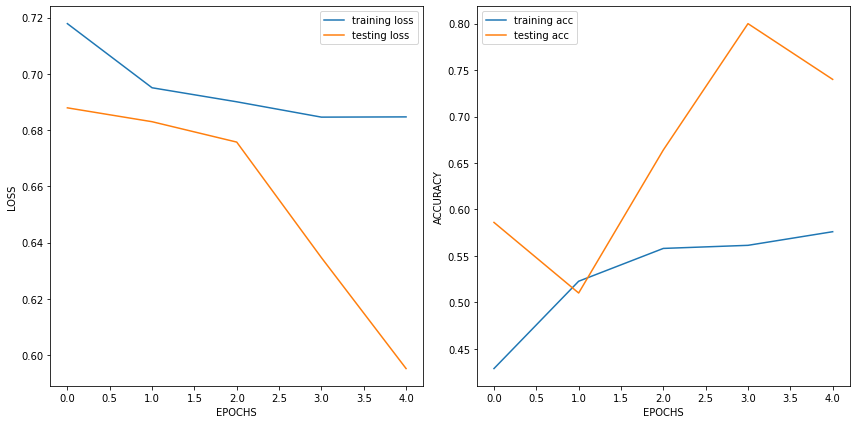

In [35]:
model_6.summary()
plot_history(history_6)

Augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented test data:
Found 500 images belonging to 2 classes.

Epoch 1/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6171 - accuracy: 0.7300 - val_loss: 0.5180 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5521 - accuracy: 0.7453 - val_loss: 0.4224 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5077 - accuracy: 0.7620 - val_loss: 0.3854 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4893 - accuracy: 0.7713 - val_loss: 0.3586 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 23s 499ms/step - loss: 0.4738 - accuracy: 0.7807 - val_loss: 0.3556 - val_accuracy: 0.8380

Model: "baseline_model_plus_pooling_with_shuffled_aug_data"
______________________

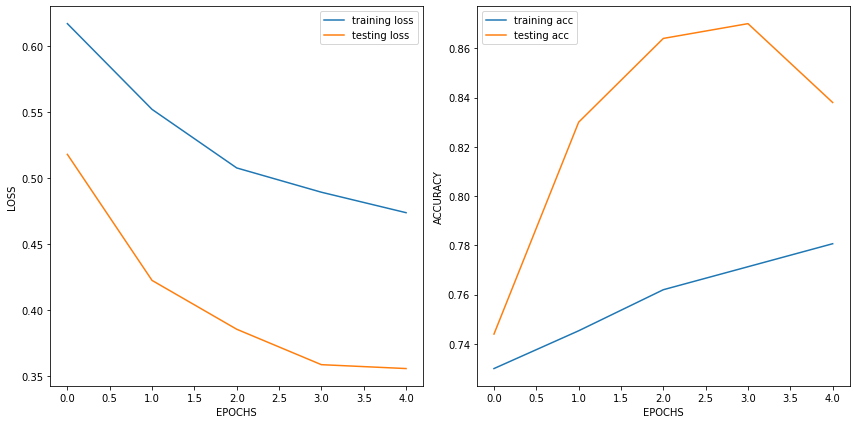

In [36]:
# now lets shuffle the data and compare
train_datagen_aug_s = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

train_datagen_s = ImageDataGenerator(rescale=1/255.)
test_datagen_s = ImageDataGenerator(rescale=1/255.)

print("Augmented training data:")
train_data_aug_s = train_datagen_aug_s.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="binary",
                                                       shuffle=True)

print("\nNon-augmented training data:")
train_data_s = train_datagen_s.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

print("\nNon-augmented test data:")
test_data_s = test_datagen_s.flow_from_directory(test_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")
print()

model_7 = Sequential([
  Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
         activation="relu", input_shape=(226, 226, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
], name="baseline_model_plus_pooling_with_shuffled_aug_data")

model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_7 = model_6.fit(train_data_aug_s, epochs=5, steps_per_epoch=len(train_data_aug_s),
                        validation_data=test_data_s, validation_steps=len(test_data_s))
print()
model_7.summary()
plot_history(history_7)

## 7. Tiny VGG with augmented data

Epoch 1/10
47/47 [==============================] - 23s 474ms/step - loss: 0.6298 - accuracy: 0.6327 - val_loss: 0.5218 - val_accuracy: 0.7500
Epoch 2/10
47/47 [==============================] - 23s 481ms/step - loss: 0.5524 - accuracy: 0.7213 - val_loss: 0.4156 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 23s 500ms/step - loss: 0.4908 - accuracy: 0.7773 - val_loss: 0.3793 - val_accuracy: 0.8320
Epoch 4/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4912 - accuracy: 0.7773 - val_loss: 0.3807 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 23s 484ms/step - loss: 0.4810 - accuracy: 0.7767 - val_loss: 0.4422 - val_accuracy: 0.8000
Epoch 6/10
47/47 [==============================] - 23s 493ms/step - loss: 0.4865 - accuracy: 0.7773 - val_loss: 0.3312 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 22s 471ms/step - loss: 0.4730 - accuracy: 0.7847 - val_loss: 0.4093 - val_accuracy: 0.8040

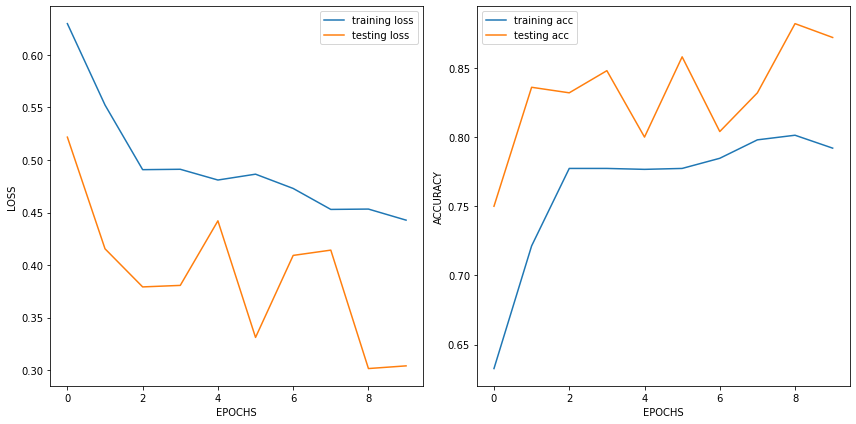

In [37]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="tinyVGG_w/_aug_data")

model_8.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

history_8 = model_8.fit(train_data_aug_s, epochs=10, 
                            steps_per_epoch=len(train_data_aug),
                            validation_data=test_data_s,
                            validation_steps=len(test_data_s))

print()
model_8.summary()
plot_history(history_8)

## Making a prediction with our trained model on a custom image

--2021-08-15 13:23:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-15 13:23:17 (42.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



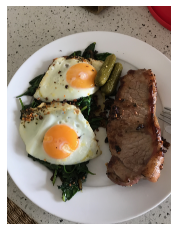

In [38]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [39]:
def load_and_prep_img(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, col_chnl).
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img / 255.
  return img

In [40]:
steak = tf.expand_dims(load_and_prep_img("03-steak.jpeg"), axis=0)
pred = model_8.predict(steak)
pred

array([[0.858966]], dtype=float32)

In [41]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [45]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  img = load_and_prep_img(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.figure()
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

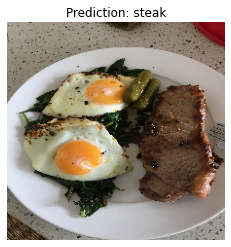

In [46]:
pred_and_plot(model_8, "03-steak.jpeg")

--2021-08-15 13:24:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-08-15 13:24:24 (33.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



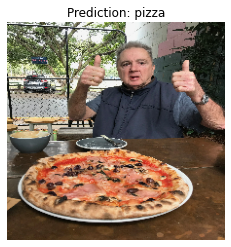

In [47]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg")

--2021-08-15 13:26:02--  https://www.thespruceeats.com/thmb/9wGyNFEsTZGdPhPcKed8Mp9o3k4=/3072x2304/smart/filters:no_upscale()/authentic-neapolitan-margherita-pizza-157507884-582612543df78c6f6acb5a8a.jpg
Resolving www.thespruceeats.com (www.thespruceeats.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.thespruceeats.com (www.thespruceeats.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879833 (859K) [image/jpeg]
Saving to: ‘authentic-neapolitan-margherita-pizza-157507884-582612543df78c6f6acb5a8a.jpg.1’

authentic-neapolita 100%[===================>] 859.21K  --.-KB/s    in 0.03s   

2021-08-15 13:26:02 (25.1 MB/s) - ‘authentic-neapolitan-margherita-pizza-157507884-582612543df78c6f6acb5a8a.jpg.1’ saved [879833/879833]



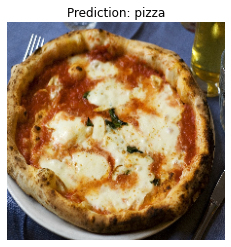

In [50]:
!wget "https://www.thespruceeats.com/thmb/9wGyNFEsTZGdPhPcKed8Mp9o3k4=/3072x2304/smart/filters:no_upscale()/authentic-neapolitan-margherita-pizza-157507884-582612543df78c6f6acb5a8a.jpg"
pred_and_plot(model_8, "authentic-neapolitan-margherita-pizza-157507884-582612543df78c6f6acb5a8a.jpg")